In [ ]:
#%load_ext autoreload
#%autoreload 2
#%matplotlib inline
#%autosave 40

In [1]:
import sys  
if '..' not in sys.path: # My notebooks are usually one directory in.
    sys.path.append('..')

In [2]:
from adaboost import Adaboost
from stump import Stump
from import_data import get_data_frame
from binary_feature_converter import Binary_feature_converter
import numpy as np

In [3]:
random_state = 42
e_n_fold = 3
i_n_fold = 3
path = '../../data/'
file_name = 'forest-cover-type.csv'

In [4]:
df = get_data_frame(path + file_name)
cols_label = [col_name for col_name in df.columns if 'Soil_Type' in col_name]
bfc = Binary_feature_converter(class_values=[1, -1], y_new_name='y', y_names=cols_label)
dfs = [bfc.convert(df=df, target_variable=col_name, replace=True) for col_name in cols_label]


Path:  ../../data/forest-cover-type.csv
Colonne tot:  55


In [5]:
dfs[0][dfs[0]['y']==1].head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1911       2173      50     28                               124   
1951       2161     113     32                               458   
1968       2110      54     25                               342   
1979       2206      65     33                               210   
1982       2132      73     27                               365   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1911                             100                              212   
1951                             142                              524   
1968                             150                              390   
1979                             144                              201   
1982                             172                              408   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
1911            219             167             64   
1951            254             188             34   
1968            225             177             71   
1979            229             155             31   
1982            239             179             53   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
1911                                 552                 0                 0   
1951                                 390                 0                 0   
1968                                 466                 0                 0   
1979                                 361                 0                 0   
1982                                 488                 0                 0   

      Wilderness_Area3  Wilderness_Area4  y  
1911                 0                 1  1  
1951                 0                 1  1  
1968                 0                 1  1  
1979                 0                 1  1  
1982                 0                 1  1

In [6]:
dfs[6][dfs[5]['y']==1].head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
2607       2103     225     20                               127   
2705       2108     240     17                               120   
2806       2283     338     24                               234   
2827       2293      27     14                               268   
2873       2030      77     22                                67   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
2607                              39                              564   
2705                              44                              474   
2806                              45                              636   
2827                              55                              616   
2873                               9                              474   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
2607            188             254            197   
2705            186             252            201   
2806            161             198            172   
2827            213             210            130   
2873            241             195             74   

      Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
2607                                 875                 0                 0   
2705                                 752                 0                 0   
2806                                 492                 0                 0   
2827                                 484                 0                 0   
2873                                 616                 0                 0   

      Wilderness_Area3  Wilderness_Area4  y  
2607                 0                 1 -1  
2705                 0                 1 -1  
2806                 0                 1 -1  
2827                 0                 1 -1  
2873                 0                 1 -1

## Nested cross validation

In [7]:
a = np.array([np.ones(10),np.ones(10),np.ones(10),range(10)])
a,a.mean(axis=0),a[3,-1]

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 array([0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 9.0)

In [8]:
a= np.zeros((4,8))
b = np.arange(4)
a[:,2]=b
a

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0.]])

In [9]:
import time
np.arange(10)*(10+np.ones(10))

array([ 0., 11., 22., 33., 44., 55., 66., 77., 88., 99.])

selected model Stump(threshold=0.5,column=0,label=(-1,1))
error 0.9765211640211642
alpha -1.863948502351307
exponents: [3.38638673e-05 3.38638673e-05 3.38638673e-05 ... 3.38638673e-05
 3.38638673e-05 3.38638673e-05]


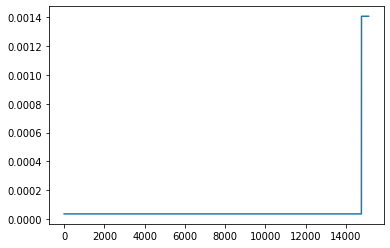

selected model Stump(threshold=15.0,column=2,label=(-1,1))
error 0.34709700805578436
alpha 0.3159121288654585
exponents: [2.59333068e-05 2.59333068e-05 2.59333068e-05 ... 4.87815603e-05
 4.87815603e-05 4.87815603e-05]


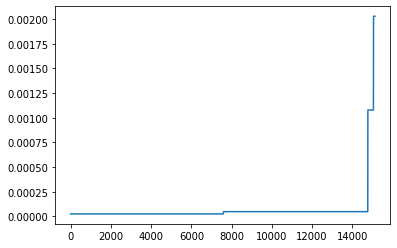

selected model Stump(threshold=1260.5,column=0,label=(-1,1))
error 0.5467729492743332
alpha -0.09382020850553244
exponents: [2.37148773e-05 2.37148773e-05 2.37148773e-05 ... 4.46086080e-05
 4.46086080e-05 4.46086080e-05]


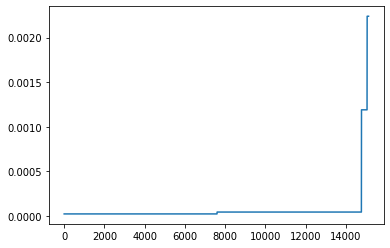

selected model Stump(threshold=15.0,column=1,label=(-1,1))
error 0.48111755243445065
alpha 0.03778286378093046
exponents: [2.46456165e-05 2.46456165e-05 2.46456165e-05 ... 4.63593645e-05
 4.63593645e-05 4.63593645e-05]


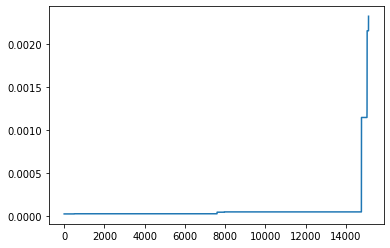

selected model Stump(threshold=1260.5,column=0,label=(-1,1))
error 0.5174966962637403
alpha -0.035007686605172735
exponents: [2.38123418e-05 2.38123418e-05 2.38123418e-05 ... 4.47919425e-05
 4.47919425e-05 4.47919425e-05]


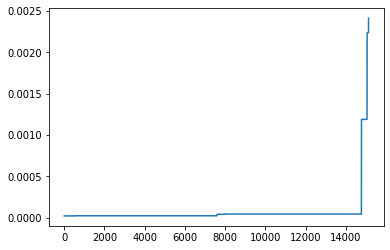

selected model Stump(threshold=15.0,column=1,label=(-1,1))
error 0.4837674797334779
alpha 0.032476453573478524
exponents: [2.46113503e-05 2.46113503e-05 2.46113503e-05 ... 4.62949086e-05
 4.62949086e-05 4.62949086e-05]


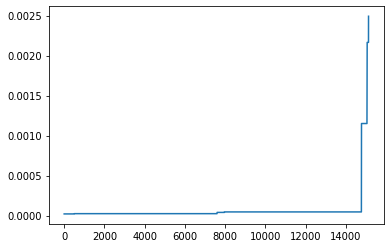

selected model Stump(threshold=1260.5,column=0,label=(-1,1))
error 0.5150755731883465
alpha -0.030160288081846717
exponents: [2.38910090e-05 2.38910090e-05 2.38910090e-05 ... 4.49399185e-05
 4.49399185e-05 4.49399185e-05]


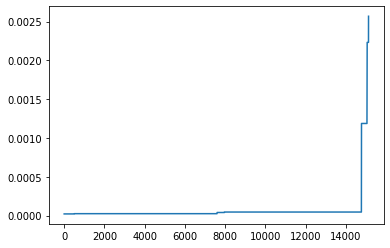

selected model Stump(threshold=15.0,column=1,label=(-1,1))
error 0.48598617447449927
alpha 0.028034993545219232
exponents: [2.45799266e-05 2.45799266e-05 2.45799266e-05 ... 4.62357994e-05
 4.62357994e-05 4.62357994e-05]


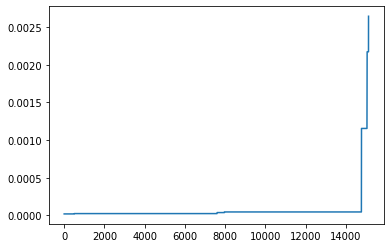

selected model Stump(threshold=1260.5,column=0,label=(-1,1))
error 0.513037096273736
alpha -0.02608010392309927
exponents: [2.39553112e-05 2.39553112e-05 2.39553112e-05 ... 4.50608735e-05
 4.50608735e-05 4.50608735e-05]


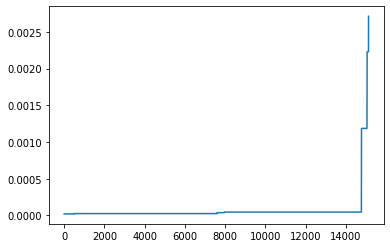

selected model Stump(threshold=15.0,column=1,label=(-1,1))
error 0.4878633060504622
alpha 0.02427815685712722
exponents: [2.45512533e-05 2.45512533e-05 2.45512533e-05 ... 4.61818638e-05
 4.61818638e-05 4.61818638e-05]


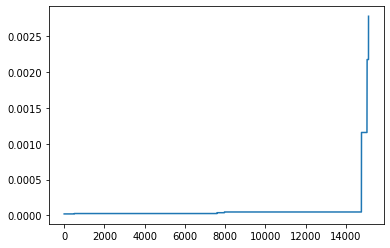

Total: 6.765


In [10]:
X = dfs[0].drop(['y'],axis=1).to_numpy()
y = dfs[0]['y'].to_numpy()
t = time.time()
ada = Adaboost(max_round=10, learning_algo=Stump)
ada.train(X,y,save_statistics=True, stops_at_round = False)
print(f'Total: {(time.time()-t)/10:.4}')



In [11]:
ada.training_error

array([0.02347884, 0.02347884, 0.02347884, 0.02347884, 0.02347884,
       0.02347884, 0.02347884, 0.02347884, 0.02347884, 0.02347884])

In [12]:
ada.alpha

array([-1.8639485 ,  0.31591213, -0.09382021,  0.03778286, -0.03500769,
        0.03247645, -0.03016029,  0.02803499, -0.0260801 ,  0.02427816])

In [13]:
np.array([ (el.sum(),np.quantile(el,[0,0.5,1])) for el in ada.weight_distribution])

array([[1.0, array([3.38638673e-05, 3.38638673e-05, 1.40845070e-03])],
       [1.0, array([2.59333068e-05, 2.59333068e-05, 2.02890067e-03])],
       [1.0, array([2.37148773e-05, 2.37148773e-05, 2.23828285e-03])],
       [1.0, array([2.28518785e-05, 2.46456165e-05, 2.32612886e-03])],
       [1.0, array([2.20792506e-05, 2.38123418e-05, 2.41047973e-03])],
       [1.0, array([2.13849862e-05, 2.46113503e-05, 2.49136189e-03])],
       [0.9999999999999998,
        array([2.07590763e-05, 2.38910090e-05, 2.56881460e-03])],
       [0.9999999999999999,
        array([2.01931108e-05, 2.45799266e-05, 2.64288855e-03])],
       [1.0, array([1.96799714e-05, 2.39553112e-05, 2.71364465e-03])],
       [0.9999999999999998,
        array([1.92135924e-05, 2.45512533e-05, 2.78115264e-03])]],
      dtype=object)

In [14]:
ada.hypotesis

array([Stump(threshold=0.5,column=0,label=(-1,1)),
       Stump(threshold=15.0,column=2,label=(-1,1)),
       Stump(threshold=1260.5,column=0,label=(-1,1)),
       Stump(threshold=15.0,column=1,label=(-1,1)),
       Stump(threshold=1260.5,column=0,label=(-1,1)),
       Stump(threshold=15.0,column=1,label=(-1,1)),
       Stump(threshold=1260.5,column=0,label=(-1,1)),
       Stump(threshold=15.0,column=1,label=(-1,1)),
       Stump(threshold=1260.5,column=0,label=(-1,1)),
       Stump(threshold=15.0,column=1,label=(-1,1))], dtype=object)

In [ ]:
e_n_fold = i_n_fold = 3
round_max = 100

e_skf = StratifiedKFold(n_splits=e_n_fold, random_state=random_state, shuffle=True)
i_skf = StratifiedKFold(n_splits=i_n_fold, random_state=random_state, shuffle=True)

X = dfs[0].drop(['y'],axis=1)
y = dfs[0]['y']

res_ext_fold = np.empty(e_n_fold, 3) #media, std, num_round
for e_nth, e_other in enumerate(e_skf.split(X,y)):
    e_tv_index, test_index = e_other
    X_tv_train, X_test, y_tv_train, y_test = X.iloc[e_tv_index], X.iloc[test_index], y.iloc[e_tv_index], y.iloc[test_index]
    
    error = np.empty((i_n_fold,round_max,2))
    for i_nth, i_other in enumerate(i_skf.split(X_tv_train,y_tv_train)):
        i_train_index, validation_index = i_other
        X_i_train, X_val, y_i_train, y_val = X.iloc[i_train_index], X.iloc[validation_index], y.iloc[i_train_index], y.iloc[validation_index]
        
        ada = Adaboost(max_round=round_max,weighted=True, randomized=True, learning_algo=Stump)
        for nth,t in enumerate(ada.train(X=X_i_train,y=y_i_train,save_statistics=True,stops_at_round = True)):
            _test_err = (t.predict(X_val)!=y_val).sum()/len(y_val)
            error[i_nth,nth,0] = _test_err
            error[i_nth,nth,1] = ada.training_error[nth]
        
    mean_internal_valid_error = error[:,:,0].mean(axis=0)
    std_internal_valid_error = error[:,:,0].std(axis=0)
    best_index_round = mean_internal_valid_error.argmin()
    best_round = best_index_round+1
    
    ada = Adaboost(max_round=best_round, weighted=True, randomized=True, learning_algo=Stump)#da controllare best index round
    ada.train(X=X_tv_train,y=y_tv_train,save_statistics=True)
    _test_error = (t.predict(X_test)!=y_test).sum()/len(y_test)
    _train_error = ada.training_error[-1]
    
    res_ext_fold[e_nth,:] = [best_round,_test_err,_train_error]
    
    print(f'Ext-fold: {e_nth+1} (Best round:{best_round}, test_err:{_test_err:.4}, train_err:{_train_error:.4})')
    
print(f'Unbiased estimate of error: {np.mean(res_ext_fold[:,1]:.4)}')

In [ ]:
from time import sleep
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool, freeze_support


for n in range(5):
    for i in tqdm(range(5000), position=n):
        sleep(0.001)